In [68]:
import cv2

In [69]:
img1 = cv2.imread('assets/ppl1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('assets/scene1.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

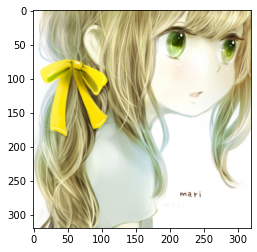

In [71]:
plt.imshow(img1)

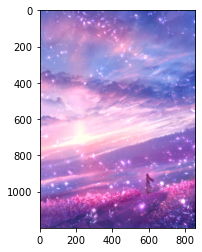

In [72]:
plt.imshow(img2)

In [73]:
img1.shape

(320, 320, 3)

In [74]:
img2.shape

(1200, 857, 3)

In [75]:
# BLEDING IMAGES OF THE SAME SIZE


In [76]:
img1=cv2.resize(img1,(1200,1200))
img2=cv2.resize(img2,(1200,1200))

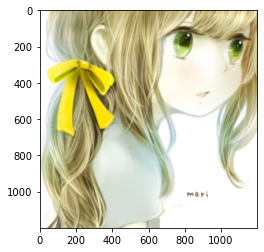

In [77]:
plt.imshow(img1)

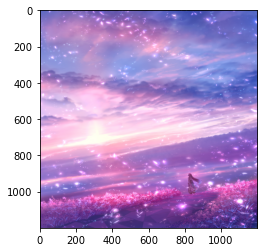

In [78]:
plt.imshow(img2)

In [79]:
# add weighted only works for the images of same size
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.3,gamma=0)

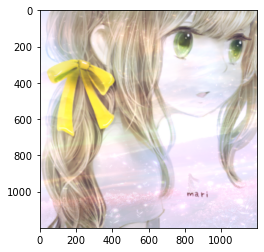

In [80]:
plt.imshow(blended)

In [81]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment

In [82]:
img1 = cv2.imread('assets/ppl1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('assets/scene1.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [83]:
img2 = cv2.resize(img2,(100,100))

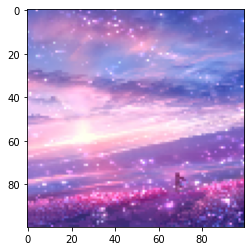

In [84]:
plt.imshow(img2)

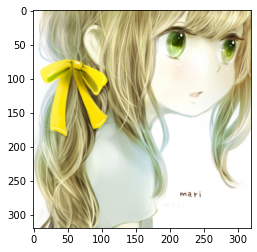

In [85]:
plt.imshow(img1)

In [86]:
large_img = img1
small_img = img2

In [87]:
x_offset = 0
y_offset = 0

In [88]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [89]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

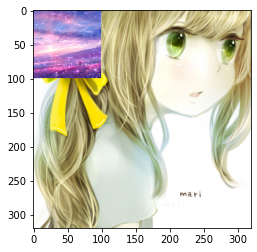

In [90]:
plt.imshow(large_img)

In [91]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [92]:
img1 = cv2.imread('assets/ppl1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('assets/scene1.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [93]:
img2 = cv2.resize(img2,(150,150))

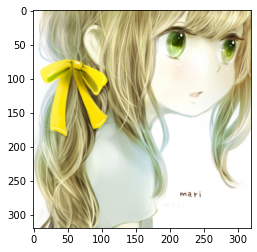

In [94]:
plt.imshow(img1)

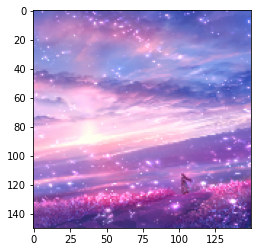

In [95]:
plt.imshow(img2)

In [96]:
img1.shape

(320, 320, 3)

In [105]:
x_offset = 320 - 150
y_offset = 320 - 150

In [106]:
img2.shape

(150, 150, 3)

In [107]:
rows,cols,channels = img2.shape

In [108]:
rows

150

In [109]:
cols

150

In [110]:
#region of interest
roi = img1[y_offset:320,x_offset:320]

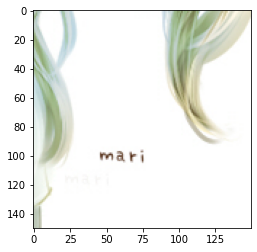

In [111]:
plt.imshow(roi)

In [113]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

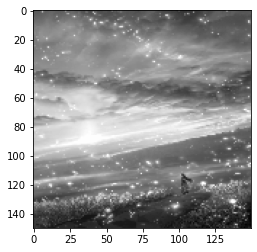

In [115]:
plt.imshow(img2gray,cmap='gray')

In [116]:
mask_inv = cv2.bitwise_not(img2gray)

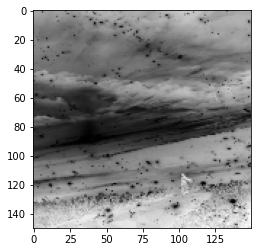

In [118]:
plt.imshow(mask_inv,cmap='gray')

In [119]:
mask_inv.shape #missing channels

(150, 150)

In [120]:
import numpy as np

In [121]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [122]:
white_background.shape

(150, 150, 3)

In [123]:
# white_background

In [124]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [125]:
bk.shape

(150, 150, 3)

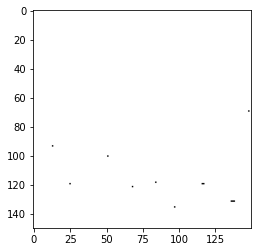

In [126]:
plt.imshow(bk)

In [127]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

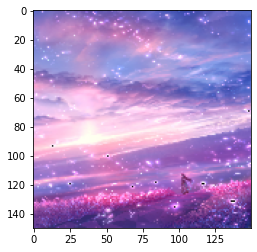

In [128]:
plt.imshow(fg)

In [129]:
final_roi = cv2.bitwise_or(roi,fg)

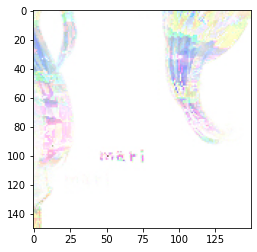

In [130]:
plt.imshow(final_roi)

In [131]:
large_img = img1
small_img = final_roi

In [133]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

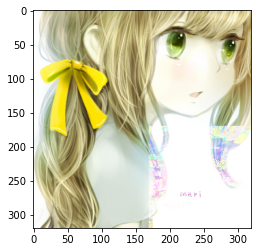

In [134]:
plt.imshow(large_img)